Links to the datasets:

https://www.kaggle.com/saurabh00007/diabetescsv

https://www.kaggle.com/johnsmith88/heart-disease-dataset


1. Implement k-Nearest Neighbor algorithm for classifying a heart dataset.
2. Implement k-Means clustering algorithm on diabetic dataset.
3. Implement linear SVM with iris dataset. Consider two classes of Iris dataset which consists of three classes by removing one of the classes.

Use appropriate plots such as barplot,violinplot and also make a plot comparing the effecieny of the algorithms for different test cases

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Users\kaust\OneDrive\Desktop\heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


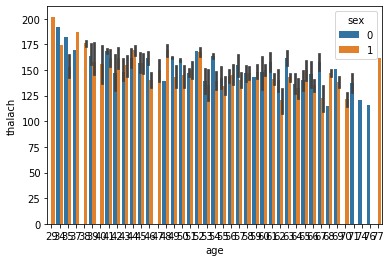

In [6]:
sns.barplot(data=df,x="age",y="thalach",hue="sex")

C:\Users\kaust\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


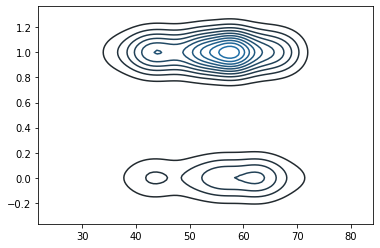

In [7]:
sns.kdeplot(data=df,shade_lowest=True)

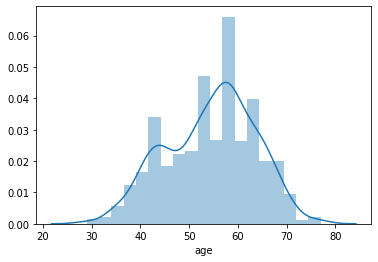

In [8]:
sns.distplot(df["age"])

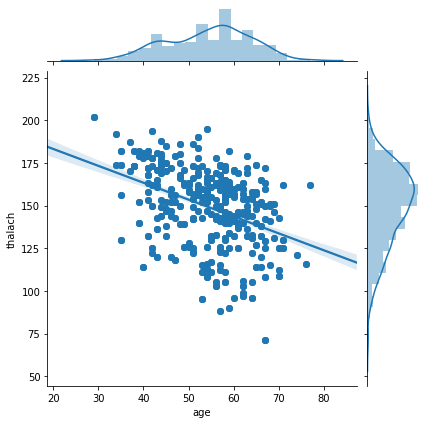

In [9]:
sns.jointplot(x="age",y="thalach",data=df,kind="reg")

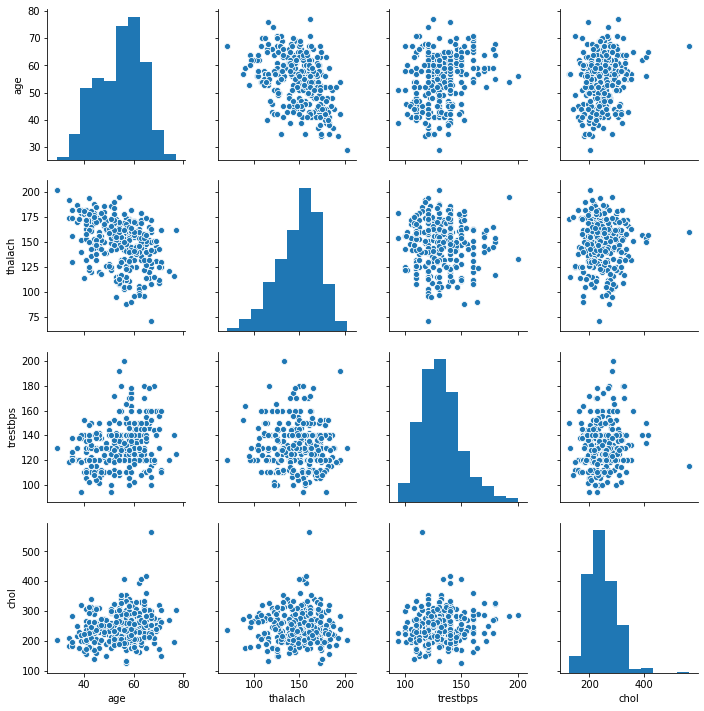

In [10]:
sns.pairplot(df[["age","thalach","trestbps","chol"]])

In [11]:
X=df.drop("target",axis=1)
y=df["target"]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
pred=knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       157
           1       0.92      0.96      0.94       151

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308



In [18]:
print(confusion_matrix(y_test,pred))

[[145  12]
 [  6 145]]


In [19]:
error_rate=[]
for i in range(40):
    if i==0:
        continue
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

In [20]:
error_rate

[0.05844155844155844,
 0.11038961038961038,
 0.16558441558441558,
 0.2305194805194805,
 0.2792207792207792,
 0.2922077922077922,
 0.2857142857142857,
 0.30844155844155846,
 0.32792207792207795,
 0.33116883116883117,
 0.31493506493506496,
 0.3246753246753247,
 0.30194805194805197,
 0.2987012987012987,
 0.30194805194805197,
 0.30844155844155846,
 0.3246753246753247,
 0.30844155844155846,
 0.3181818181818182,
 0.32142857142857145,
 0.3116883116883117,
 0.3181818181818182,
 0.3116883116883117,
 0.32142857142857145,
 0.3246753246753247,
 0.33766233766233766,
 0.37337662337662336,
 0.35714285714285715,
 0.35064935064935066,
 0.33766233766233766,
 0.34415584415584416,
 0.3409090909090909,
 0.33766233766233766,
 0.3409090909090909,
 0.35714285714285715,
 0.3538961038961039,
 0.36038961038961037,
 0.36038961038961037,
 0.36038961038961037]

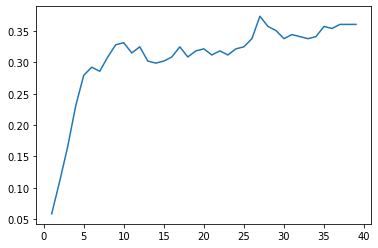

In [21]:
plt.plot(range(1,40),error_rate)